In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.plotly as py
import plotly.graph_objs as go
from ggplot import *
%pylab inline


def isNaN(num):
    return num != num

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df_airport = pd.read_csv('data_airports.csv')
df_airport.head()

,airport_id,name,city,State,latitude,longitude
0,1,Hartsfield Jackson Atlanta Intl,Atlanta,GA,33.636719,-84.428067
1,2,Los Angeles Intl,Los Angeles,CA,33.942536,-118.408075
2,3,Chicago Ohare Intl,Chicago,IL,41.978603,-87.904842
3,4,Dallas Fort Worth Intl,Dallas-fort Worth,TX,32.896828,-97.037997
4,5,John F Kennedy Intl,New York,NY,40.639751,-73.778925


In [5]:
df["latitude"] = 0.0
df["longitude"] = 0.0
i = -1
for num in df.tweet_coord:
    i = i+1
    if isNaN(num)==False:
        #print num
        a = num
        aa = a[1:len(a)-1]
        aa.split(',')
        df["latitude"][i] = float(aa.split(",")[0])
        df["longitude"][i] = float(aa.split(",")[1])
        
df.head()        
       
 
        

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,latitude,longitude
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),0,0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),0,0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),0,0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0,0


In [8]:
df['airport_name'] = '';
df['airport_city'] = '';
df['airport_state'] = '';
df['airport_lat'] = 0.0;
df['airport_lon'] = 0.0;



for i in range(0,len(df['latitude'])):
    d_all = 0;
    if (df['latitude'][i]!=0):
        d_all = (df_airport['latitude']-df['latitude'][i])**2+(df_airport['longitude']-df['longitude'][i])**2
        ind_min = np.argmin(d_all)
        #print i,df_airport['latitude'][ind_min];
        df['airport_name'][i]=df_airport['name'][ind_min]
        df['airport_city'][i]=df_airport['city'][ind_min]
        df['airport_state'][i]=df_airport['State'][ind_min]
        df['airport_lat'][i] = df_airport['latitude'][ind_min];
        df['airport_lon'][i] = df_airport['longitude'][ind_min];
    
        

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See

In [9]:
df[21:]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_created,tweet_location,user_timezone,latitude,longitude,airport_name,airport_city,airport_state,airport_lat,airport_lon
21,570264145116819457,positive,1.0000,NaN,NaN,Virgin America,NaN,DT_Les,NaN,0,...,2015-02-24 08:49:01 -0800,NaN,NaN,40.748043,-73.992953,La Guardia,New York,NY,40.777245,-73.872608
22,570259420287868928,positive,1.0000,NaN,NaN,Virgin America,NaN,ElvinaBeck,NaN,0,...,2015-02-24 08:30:15 -0800,Los Angeles,Pacific Time (US & Canada),0.000000,0.000000,,,,0.000000,0.000000
23,570258822297579520,neutral,1.0000,NaN,NaN,Virgin America,NaN,rjlynch21086,NaN,0,...,2015-02-24 08:27:52 -0800,"Boston, MA",Eastern Time (US & Canada),0.000000,0.000000,,,,0.000000,0.000000
24,570256553502068736,negative,1.0000,Customer Service Issue,0.3557,Virgin America,NaN,ayeevickiee,NaN,0,...,2015-02-24 08:18:51 -0800,714,Mountain Time (US & Canada),0.000000,0.000000,,,,0.000000,0.000000
25,570249102404923392,negative,1.0000,Customer Service Issue,1.0000,Virgin America,NaN,Leora13,NaN,0,...,2015-02-24 07:49:15 -0800,NaN,NaN,0.000000,0.000000,,,,0.000000,0.000000
26,570239632807370753,negative,1.0000,Can't Tell,0.6614,Virgin America,NaN,meredithjlynn,NaN,0,...,2015-02-24 07:11:37 -0800,NaN,NaN,0.000000,0.000000,,,,0.000000,0.000000
27,570217831557677057,neutral,0.6854,NaN,NaN,Virgin America,NaN,AdamSinger,NaN,0,...,2015-02-24 05:44:59 -0800,"San Francisco, CA",Central Time (US & Canada),0.000000,0.000000,,,,0.000000,0.000000
28,570207886493782019,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,blackjackpro911,NaN,0,...,2015-02-24 05:05:28 -0800,"San Mateo, CA & Las Vegas, NV",NaN,42.361016,-71.020005,General Edward Lawrence Logan Intl,Boston,MA,42.364347,-71.005181
29,570124596180955136,neutral,0.6150,NaN,0.0000,Virgin America,NaN,TenantsUpstairs,NaN,0,...,2015-02-23 23:34:30 -0800,Brooklyn,Atlantic Time (Canada),33.945404,-118.406247,Los Angeles Intl,Los Angeles,CA,33.942536,-118.408075
30,570114021854212096,negative,1.0000,Flight Booking Problems,1.0000,Virgin America,NaN,jordanpichler,NaN,0,...,2015-02-23 22:52:29 -0800,NaN,Vienna,0.000000,0.000000,,,,0.000000,0.000000


In [11]:
df_small = df[['tweet_id',"airline_sentiment","airline","negativereason","latitude","longitude","user_timezone",
              'airport_name','airport_city','airport_state','airport_lat','airport_lon']]
df_small.to_csv('data_twitter.csv')
df_small

,tweet_id,airline_sentiment,airline,negativereason,latitude,longitude,user_timezone,airport_name,airport_city,airport_state,airport_lat,airport_lon
0,570306133677760513,neutral,Virgin America,NaN,0.000000,0.000000,Eastern Time (US & Canada),,,,0.000000,0.000000
1,570301130888122368,positive,Virgin America,NaN,0.000000,0.000000,Pacific Time (US & Canada),,,,0.000000,0.000000
2,570301083672813571,neutral,Virgin America,NaN,0.000000,0.000000,Central Time (US & Canada),,,,0.000000,0.000000
3,570301031407624196,negative,Virgin America,Bad Flight,0.000000,0.000000,Pacific Time (US & Canada),,,,0.000000,0.000000
4,570300817074462722,negative,Virgin America,Can't Tell,0.000000,0.000000,Pacific Time (US & Canada),,,,0.000000,0.000000
5,570300767074181121,negative,Virgin America,Can't Tell,0.000000,0.000000,Pacific Time (US & Canada),,,,0.000000,0.000000
6,570300616901320704,positive,Virgin America,NaN,0.000000,0.000000,Pacific Time (US & Canada),,,,0.000000,0.000000
7,570300248553349120,neutral,Virgin America,NaN,0.000000,0.000000,Pacific Time (US & Canada),,,,0.000000,0.000000
8,570299953286942721,positive,Virgin America,NaN,0.000000,0.000000,Pacific Time (US & Canada),,,,0.000000,0.000000
9,570295459631263746,positive,Virgin America,NaN,0.000000,0.000000,Eastern Time (US & Canada),,,,0.000000,0.000000


In [12]:
df[21:]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_created,tweet_location,user_timezone,latitude,longitude,airport_name,airport_city,airport_state,airport_lat,airport_lon
21,570264145116819457,positive,1.0000,NaN,NaN,Virgin America,NaN,DT_Les,NaN,0,...,2015-02-24 08:49:01 -0800,NaN,NaN,40.748043,-73.992953,La Guardia,New York,NY,40.777245,-73.872608
22,570259420287868928,positive,1.0000,NaN,NaN,Virgin America,NaN,ElvinaBeck,NaN,0,...,2015-02-24 08:30:15 -0800,Los Angeles,Pacific Time (US & Canada),0.000000,0.000000,,,,0.000000,0.000000
23,570258822297579520,neutral,1.0000,NaN,NaN,Virgin America,NaN,rjlynch21086,NaN,0,...,2015-02-24 08:27:52 -0800,"Boston, MA",Eastern Time (US & Canada),0.000000,0.000000,,,,0.000000,0.000000
24,570256553502068736,negative,1.0000,Customer Service Issue,0.3557,Virgin America,NaN,ayeevickiee,NaN,0,...,2015-02-24 08:18:51 -0800,714,Mountain Time (US & Canada),0.000000,0.000000,,,,0.000000,0.000000
25,570249102404923392,negative,1.0000,Customer Service Issue,1.0000,Virgin America,NaN,Leora13,NaN,0,...,2015-02-24 07:49:15 -0800,NaN,NaN,0.000000,0.000000,,,,0.000000,0.000000
26,570239632807370753,negative,1.0000,Can't Tell,0.6614,Virgin America,NaN,meredithjlynn,NaN,0,...,2015-02-24 07:11:37 -0800,NaN,NaN,0.000000,0.000000,,,,0.000000,0.000000
27,570217831557677057,neutral,0.6854,NaN,NaN,Virgin America,NaN,AdamSinger,NaN,0,...,2015-02-24 05:44:59 -0800,"San Francisco, CA",Central Time (US & Canada),0.000000,0.000000,,,,0.000000,0.000000
28,570207886493782019,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,blackjackpro911,NaN,0,...,2015-02-24 05:05:28 -0800,"San Mateo, CA & Las Vegas, NV",NaN,42.361016,-71.020005,General Edward Lawrence Logan Intl,Boston,MA,42.364347,-71.005181
29,570124596180955136,neutral,0.6150,NaN,0.0000,Virgin America,NaN,TenantsUpstairs,NaN,0,...,2015-02-23 23:34:30 -0800,Brooklyn,Atlantic Time (Canada),33.945404,-118.406247,Los Angeles Intl,Los Angeles,CA,33.942536,-118.408075
30,570114021854212096,negative,1.0000,Flight Booking Problems,1.0000,Virgin America,NaN,jordanpichler,NaN,0,...,2015-02-23 22:52:29 -0800,NaN,Vienna,0.000000,0.000000,,,,0.000000,0.000000


In [10]:
i = 1
d_all = (df_airport['latitude']-df['latitude'][i])**2+(df_airport['longitude']-df['longitude'][i])**2
ind_min = np.argmin(d_all)
df_airport['name'][ind_min]

'General Edward Lawrence Logan Intl'

In [438]:
a = "[40.74804263, -73.99295302]"
aa = a[1:len(a)-1]
aa.split(',')
lat = float(aa.split(",")[0])
lng = float(aa.split(",")[1])
lat

40.74804263

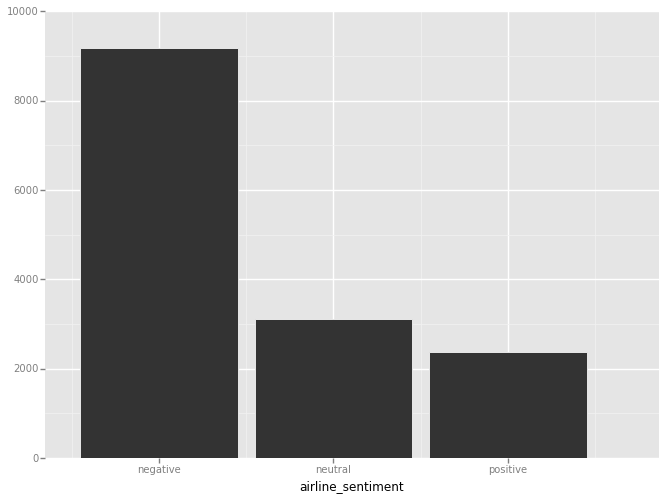

<ggplot: (303131665)>

In [53]:
ggplot(df, aes('airline_sentiment'))+geom_histogram()

In [361]:
df_small2 = df[['tweet_id',"airline_sentiment","airline"]]
df_small2 = df_small2.groupby(["airline"], as_index = False).count()

df_small = df[['tweet_id',"airline_sentiment"]]
df_small = df_small.groupby("airline_sentiment").count()
df_small


x = np.arange(.5,3 , 1);
y = np.array([df_small.tweet_id['negative'],df_small.tweet_id['neutral'],df_small.tweet_id['positive']])
width = 0.4

fig_bar, ax = plt.subplots()
br = plt.bar(x,y, width)
plt.xticks(x + width/2., ('Negative', 'Neutral', 'Positive'))
plt.xlim(.4,3)
py.iplot_mpl(fig_bar)


In [445]:
df.name

0                cairdin
1               jnardino
2             yvonnalynn
3               jnardino
4               jnardino
5               jnardino
6             cjmcginnis
7                  pilot
8               dhepburn
9             YupitsTate
10       idk_but_youtube
11          HyperCamiLax
12          HyperCamiLax
13          mollanderson
14              sjespers
15       smartwatermelon
16         ItzBrianHunty
17         heatherovieda
18          thebrandiray
19             JNLpierce
20                MISSGJ
21                DT_Les
22            ElvinaBeck
23          rjlynch21086
24           ayeevickiee
25               Leora13
26         meredithjlynn
27            AdamSinger
28       blackjackpro911
29       TenantsUpstairs
              ...       
14610           Jess_JCW
14611        TrueChief77
14612      tcunningham10
14613       kiabeveridge
14614           GregPoos
14615         tim_sheehy
14616      TheJoshAbides
14617            iambmac
14618    A_for_AdNauseam


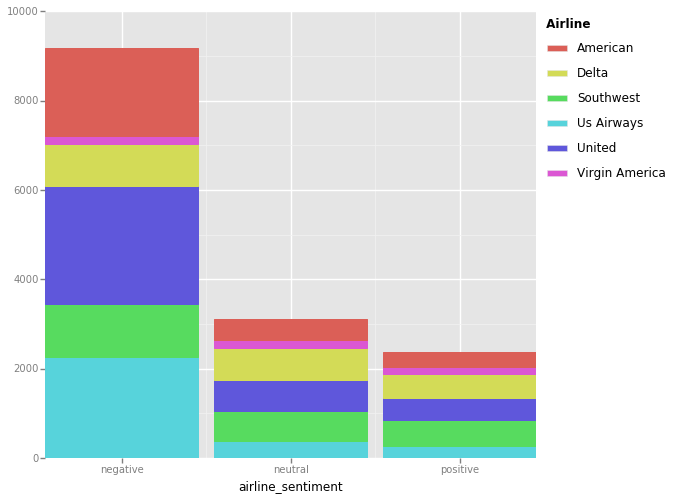

<ggplot: (318223245)>

In [5]:
df_small = df[['tweet_id',"airline_sentiment","airline","negativereason","latitude","longitude","user_timezone"]]
df_small.to_csv('data_twitter.csv')
df_small

,tweet_id,airline_sentiment,airline,negativereason,latitude,longitude,user_timezone
0,570306133677760513,neutral,Virgin America,NaN,0.000000,0.000000,Eastern Time (US & Canada)
1,570301130888122368,positive,Virgin America,NaN,0.000000,0.000000,Pacific Time (US & Canada)
2,570301083672813571,neutral,Virgin America,NaN,0.000000,0.000000,Central Time (US & Canada)
3,570301031407624196,negative,Virgin America,Bad Flight,0.000000,0.000000,Pacific Time (US & Canada)
4,570300817074462722,negative,Virgin America,Can't Tell,0.000000,0.000000,Pacific Time (US & Canada)
5,570300767074181121,negative,Virgin America,Can't Tell,0.000000,0.000000,Pacific Time (US & Canada)
6,570300616901320704,positive,Virgin America,NaN,0.000000,0.000000,Pacific Time (US & Canada)
7,570300248553349120,neutral,Virgin America,NaN,0.000000,0.000000,Pacific Time (US & Canada)
8,570299953286942721,positive,Virgin America,NaN,0.000000,0.000000,Pacific Time (US & Canada)
9,570295459631263746,positive,Virgin America,NaN,0.000000,0.000000,Eastern Time (US & Canada)


In [349]:
df_small = df[['tweet_id',"airline_sentiment","airline","negativereason","latitude","longitude"]]
df_small.to_csv('data_submission_twitter.csv')

In [364]:
airlines = ["United","US Airways","Virgin America","American","Delta","Southwest"]
df_small['total_comments'] = 0
for airlinename in airlines:
    print airlinename
    ind_ar = df_small['airline']==airlinename
    ind_2 = df_small2.airline ==airlinename
    print df_small2["tweet_id"][ind_2]
    df_small['total_comments'][ind_ar]=int(df_small2["tweet_id"][ind_2])

United
4    3822
Name: tweet_id, dtype: int64
US Airways
3    2913
Name: tweet_id, dtype: int64
Virgin America
5    504
Name: tweet_id, dtype: int64
American
0    2759
Name: tweet_id, dtype: int64
Delta
1    2222
Name: tweet_id, dtype: int64
Southwest
2    2420
Name: tweet_id, dtype: int64


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [365]:
a = int(df_small2["tweet_id"][ind_2])
df_small["ratio"] = df_small["tweet_id"]/df_small["total_comments"]

In [459]:
df_small.negativereason[isNaN(df_small.negativereason)]="Reason NA"


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [462]:
unique(df_small.negativereason)
df_small.to_csv('data_twitter.csv')

In [387]:
gbar = ggplot(df_small, aes(x = "airline", y = "tweet_id", fill = "airline_sentiment"))
gbar=gbar + geom_bar(stat = 'identity', position = 'fill')
gbar1 = gbar

gbar = ggplot(df_small, aes(x = "airline", y = "ratio", fill = "airline_sentiment"))
gbar=gbar + geom_bar(stat = 'identity')
gbar2 = gbar



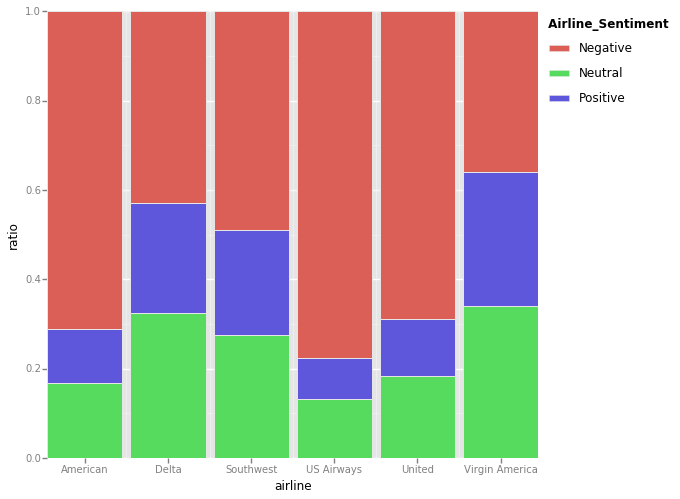

<ggplot: (325417353)>

In [388]:
gbar2

In [464]:
df_small.head()

,tweet_id,airline_sentiment,airline,negativereason,latitude,longitude
0,570306133677760513,neutral,Virgin America,Reason NA,0,0
1,570301130888122368,positive,Virgin America,Reason NA,0,0
2,570301083672813571,neutral,Virgin America,Reason NA,0,0
3,570301031407624196,negative,Virgin America,Bad Flight,0,0
4,570300817074462722,negative,Virgin America,Can't Tell,0,0


In [184]:
df2 = df_small['tweet_id'].to_frame()
df2.tweet_id.keys

<bound method Series.keys of airline_sentiment  airline       
negative           American          1960
                   Delta              955
                   Southwest         1186
                   US Airways        2263
                   United            2633
                   Virgin America     181
neutral            American           463
                   Delta              723
                   Southwest          664
                   US Airways         381
                   United             697
                   Virgin America     171
positive           American           336
                   Delta              544
                   Southwest          570
                   US Airways         269
                   United             492
                   Virgin America     152
Name: tweet_id, dtype: int64>

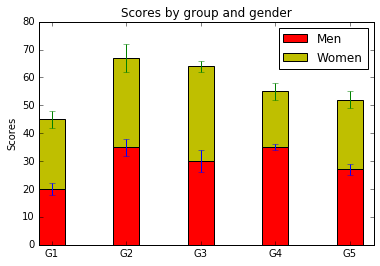

In [104]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [98]:
x

array([ 0.5,  1.5])

In [20]:

n = 50
x, y, z, s, ew = np.random.rand(5, n)
c, ec = np.random.rand(2, n, 4)
area_scale, width_scale = 500, 5

fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=c,
                s=np.square(s)*area_scale,
                edgecolor=ec,
                linewidth=ew*width_scale)
ax.grid()

py.iplot_mpl(fig)


In [4]:
data.head()


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
